In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd "/content/drive/My Drive/EVA4/Notebooks/S11"

/content/drive/My Drive/EVA4/Notebooks/S11


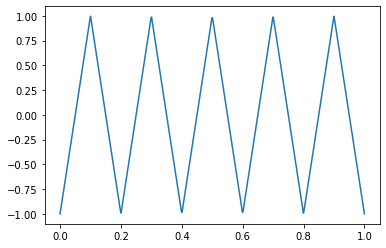

In [3]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500)
triangle = signal.sawtooth(2 * np.pi * 5 * t, 0.5)
plt.plot(t, triangle)
#A 5 Hz waveform sampled at 500 Hz for 1 second:

In [4]:
np.linspace(0.00001, 1, 15)

array([1.00000000e-05, 7.14378571e-02, 1.42865714e-01, 2.14293571e-01,
       2.85721429e-01, 3.57149286e-01, 4.28577143e-01, 5.00005000e-01,
       5.71432857e-01, 6.42860714e-01, 7.14288571e-01, 7.85716429e-01,
       8.57144286e-01, 9.28572143e-01, 1.00000000e+00])

In [5]:
np.power(np.linspace(0.0, 1.0, num=9), 2)

array([0.      , 0.015625, 0.0625  , 0.140625, 0.25    , 0.390625,
       0.5625  , 0.765625, 1.      ])

In [6]:
from vision import dataloaders
from vision.utils import Helper
from vision.models.resnet import ResNet18
from vision.models.customeResNet import CustomModel
from vision.imagetransforms import TorchTransforms,  album_transforms
import torch
from torchvision import  transforms
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from vision.train_test_model import RunModel
from vision.lr_finder import LRFinder
from torch.optim.lr_scheduler import ReduceLROnPlateau
from vision import plot_grad
from vision import train_test_model
import math

  pip install torch-lr-finder -v --global-option="amp"


In [0]:
helper = Helper()

In [0]:
Net = CustomModel()
# Net = ResNet18()

In [9]:
size =  (3, 32, 32)
helper.model_summary(Net, size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [10]:
mean, std = helper.get_mean_and_std('cifar10')

Files already downloaded and verified


In [0]:
test_transforms = [ transforms.ToTensor(),
                    transforms.Normalize(mean, std)
                  ]

In [0]:
torch_transforms = TorchTransforms(test_transforms)

In [13]:
aub = album_transforms()

Files already downloaded and verified


In [0]:
train_transforms = aub
test_transforms = torch_transforms.testTransform()
loader = dataloaders.Loader(train_transforms, test_transforms, 'cifar10', batch_size=512)

In [15]:
train_dataloader  = loader.dataloader_train()
test_dataloader = loader.dataloader_test()
gradcam_dataloader = loader.dataloader_gradcam()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [16]:
len(train_dataloader)

98

In [0]:
epochs = 1
L1 = 0
L2 = 0.0001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net.parameters(), lr=1e-1,momentum=0.9, weight_decay=L2)#, nesterov=True)
scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience = 2,min_lr=1e-5)

In [18]:
run = RunModel(Net, train_dataloader, test_dataloader, optimizer, scheduler, epochs, criterion=criterion)
run.train_test()

  0%|          | 0/98 [00:00<?, ?it/s]

Epoch 1:
---------


RuntimeError: ignored

Modified

In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
# import warnings
# warnings.simplefilter('ignore')
# it = iter(gradcam_dataloader)
# fig=plt.figure(figsize=(14, 16))
# count = 0
# while(count != 2):
#     images, labels = it.next()
#     output = Net(images.cuda())
#     pred = output.argmax(dim=1, keepdim=True)
#     if(classes[pred] != classes[labels]):
#       plot_grad.get_gradcam(Net, images, classes, str(classes[labels]), str(classes[pred]))
#       count=count+1

In [0]:
# helper.plot_acc_graph(train_acc, test_acc, epochs)

In [0]:
# helper.plot_loss_graph(trainloss_, testloss_, epochs)